In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [76]:
metadata_df = pd.read_csv("../data/ashrae-energy-prediction/building_metadata.csv")
weather_train_df = pd.read_csv("../data/ashrae-energy-prediction/weather_train.csv")
train_df = pd.read_csv("../data/ashrae-energy-prediction/train.csv")
sample_submission_df = pd.read_csv("../data/ashrae-energy-prediction/sample_submission.csv")

In [13]:
weather_test_df = pd.read_csv("../data/ashrae-energy-prediction/weather_test.csv")

In [247]:
train_df = pd.read_csv("data/ashrae-energy-prediction/train.csv")


In [9]:
test_df = pd.read_csv("../data/ashrae-energy-prediction/test.csv")

In [ ]:
train_df["timestamp"]= pd.to_datetime(train_df["timestamp"])
weather_train_df["timestamp"]= pd.to_datetime(weather_train_df["timestamp"])

In [3]:
df = pd.read_csv("Arapahoe_County_Weather_Data_March_1.csv", low_memory=False)

In [37]:
df1 = df[df["REPORT_TYPE"] == "SOD  "]
df2 = df1[["DailyHeatingDegreeDays", "DailyCoolingDegreeDays", "REPORT_TYPE"]]
df2["DailyHeatingDegreeDays"].unique()

array(['24', '19', '16', '17', '15', '33', '42', '32', '25', '20', '12',
       '21', '28', '27', '13', '36', '22', '8', '7', '18', '9', '37',
       '46', '38', '30', '6', '0', '5', '11', '4', '1', '14', '3', '10',
       '2', '23', '47', '54', '41', '29', '31', '26', '35', '43', '34',
       '44', '40', '14s', '39', '25s', '57', '64', '68', '52'],
      dtype=object)

In [48]:
df2["DailyHeatingDegreeDays"].replace("14s", "14", inplace=True)

In [49]:
df2["DailyHeatingDegreeDays"].replace("25s", "25", inplace=True)

In [51]:
df2["DailyCoolingDegreeDays"].unique()

array(['0', '1', '3', '6', '7', '5', '8', '9', '10', '4', '11', '14', '2',
       '13', '12', '16', '15', '18', '17', '0s'], dtype=object)

In [52]:
df2[df2["DailyCoolingDegreeDays"] == "0s"]

,DailyHeatingDegreeDays,DailyCoolingDegreeDays,REPORT_TYPE
8300,14,0s,SOD
8967,25,0s,SOD


In [54]:
df2["DailyCoolingDegreeDays"].replace("0s", "0", inplace=True)

In [59]:
df2["DailyCoolingDegreeDays"] = df2["DailyCoolingDegreeDays"].astype(int)
df2["DailyHeatingDegreeDays"] = df2["DailyHeatingDegreeDays"].astype(int)

/Users/justintyrrell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/justintyrrell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [60]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 26 to 10254
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DailyHeatingDegreeDays  366 non-null    int64 
 1   DailyCoolingDegreeDays  366 non-null    int64 
 2   REPORT_TYPE             366 non-null    object
dtypes: int64(2), object(1)
memory usage: 11.4+ KB


In [61]:
HDD = df2["DailyHeatingDegreeDays"].sum()
CDD = df2["DailyCoolingDegreeDays"].sum()

In [62]:
HDD, CDD

(5655, 1013)

In [5]:
metadata_df.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [6]:
metadata_df["site_id"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [7]:
metadata_df[metadata_df["primary_use"] == "Education"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549 entries, 0 to 1445
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site_id      549 non-null    int64  
 1   building_id  549 non-null    int64  
 2   primary_use  549 non-null    object 
 3   square_feet  549 non-null    int64  
 4   year_built   326 non-null    float64
 5   floor_count  172 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 30.0+ KB


In [8]:
weather_train_df.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [9]:
weather_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   site_id             139773 non-null  int64         
 1   timestamp           139773 non-null  datetime64[ns]
 2   air_temperature     139718 non-null  float64       
 3   cloud_coverage      70600 non-null   float64       
 4   dew_temperature     139660 non-null  float64       
 5   precip_depth_1_hr   89484 non-null   float64       
 6   sea_level_pressure  129155 non-null  float64       
 7   wind_direction      133505 non-null  float64       
 8   wind_speed          139469 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 9.6 MB


In [10]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site_id      1449 non-null   int64  
 1   building_id  1449 non-null   int64  
 2   primary_use  1449 non-null   object 
 3   square_feet  1449 non-null   int64  
 4   year_built   675 non-null    float64
 5   floor_count  355 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 68.0+ KB


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int64  
 1   meter          int64  
 2   timestamp      object 
 3   meter_reading  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 616.9+ MB


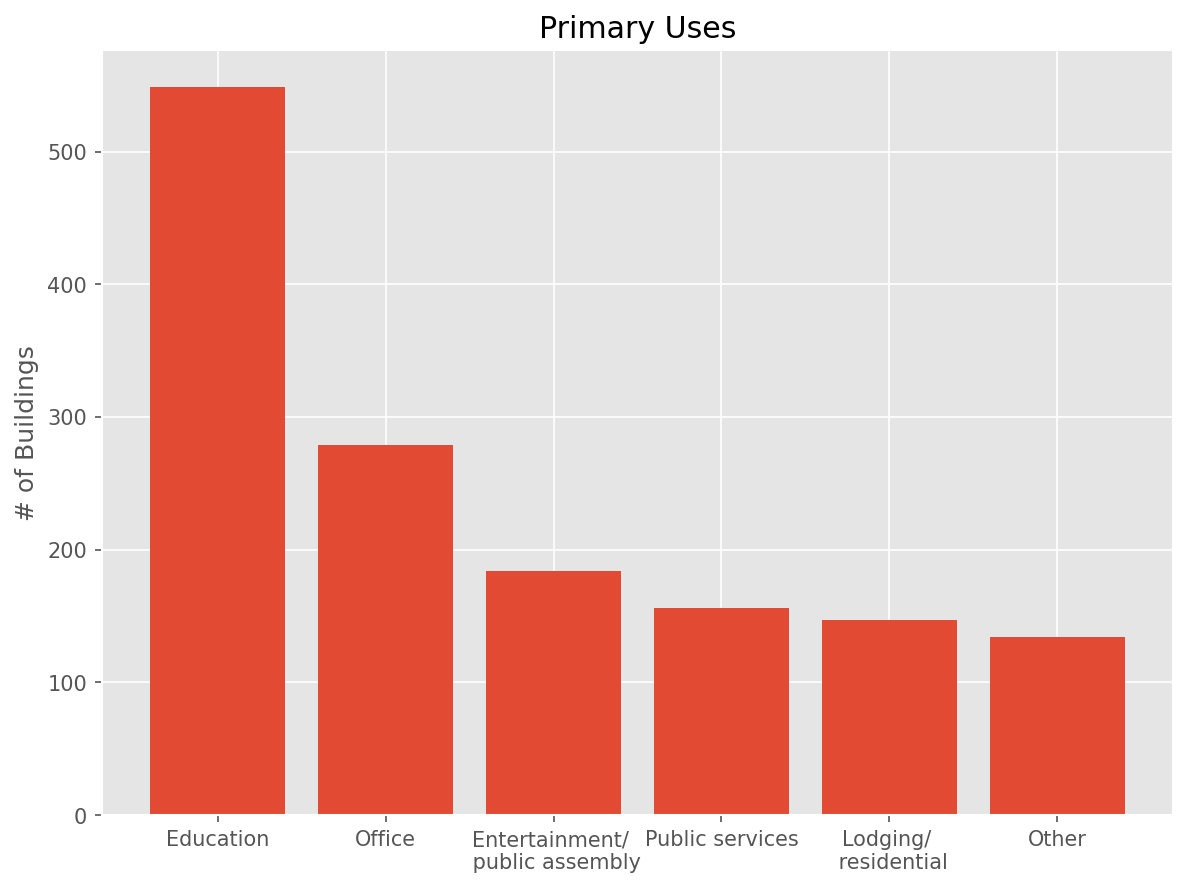

In [137]:
def primary_use_bar_graph(data, labels):
    primary_use = data.groupby(by="primary_use").count()["building_id"]
    primary_use = primary_use.sort_values(ascending=False)
    other = pd.Series([primary_use[5:].sum()], index=(["Other"]))
    primary_use = primary_use[:5].append(other)
    
    fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
    plt.style.use("ggplot")
    ax.set_title("Primary Uses")
    ax.set_ylabel("# of Buildings")
    ax.bar(labels, primary_use.values)
    fig.tight_layout(pad=1);
    
labels = ["Education", "Office", "Entertainment/ \n public assembly", "Public services", "Lodging/ \n residential", "Other"]
primary_use_bar_graph(metadata_df, labels)

In [92]:
train_df.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [135]:
# def primary_use_pyplot(data): # merge the smallest section into other and make bar graph
#     # Pie chart, where the slices will be ordered and plotted counter-clockwise:
#     labels = data.index
#     sizes = data.values
   

#     fig1, ax1 = plt.subplots()
#     ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=90)
#     ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#     plt.show()
    
# primary_use_pyplot(primary_use_percentage)

In [36]:
metadata_df["primary_use"].unique()

array(['Education', 'Lodging/residential', 'Office',
       'Entertainment/public assembly', 'Other', 'Retail', 'Parking',
       'Public services', 'Warehouse/storage', 'Food sales and service',
       'Religious worship', 'Healthcare', 'Utility', 'Technology/science',
       'Manufacturing/industrial', 'Services'], dtype=object)

In [12]:
metadata_df["floor_count"].unique()

array([nan,  5.,  4., 10.,  6.,  8.,  7.,  9., 13., 16., 11., 12.,  2.,
        3.,  1., 14., 21., 26., 19.])

In [13]:
len(metadata_df["building_id"].unique())

1449

In [14]:
len(metadata_df["site_id"].unique())

16

In [55]:
train_df.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01,0.0
1,1,0,2016-01-01,0.0
2,2,0,2016-01-01,0.0
3,3,0,2016-01-01,0.0
4,4,0,2016-01-01,0.0


In [ ]:
train_copy = train_df.copy()
train_copy[train_copy["meter_reading"] == ]

In [94]:

# metadata_copy[metadata_copy["primary_use"] == "Other"]

weather_train_copy = weather_train_df.copy()
weather_train_copy.drop(["precip_depth_1_hr", "cloud_coverage"], axis=1, inplace=True)

In [125]:
# combined_df = metadata_df.join(other=train_df, on="building_id", how="right")
combined_df = pd.merge(left=metadata_df, right=train_df, how="left")

In [43]:
combined_df["meter"].unique()

array([0, 1, 3, 2])

In [126]:
# df['year'] = pd.DatetimeIndex(df['birth_date']).year
combined_df_copy = combined_df.copy()
combined_df_copy["year"] = pd.DatetimeIndex(combined_df["timestamp"]).year
combined_df_copy["year"].unique()

array([2016])

In [127]:
building_zero = combined_df[combined_df["building_id"] == 1000]

In [98]:
building_zero["meter"].unique()

array([0, 1, 3])

In [99]:
building_zero.tail()

,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,timestamp,meter_reading
12401917,10,1000,Education,121146,NaN,2.0,1,2016-12-31 22:00:00,0.000
12401918,10,1000,Education,121146,NaN,2.0,3,2016-12-31 22:00:00,499.712
12401919,10,1000,Education,121146,NaN,2.0,0,2016-12-31 23:00:00,42.000
12401920,10,1000,Education,121146,NaN,2.0,1,2016-12-31 23:00:00,0.000
12401921,10,1000,Education,121146,NaN,2.0,3,2016-12-31 23:00:00,400.384


In [131]:
len(building_zero)

26302

In [112]:
building_zero[building_zero["meter"] == 3]["meter_reading"].sort_values()

12388772       0.00
12388237       0.00
12388234       0.00
12388231       0.00
12388228       0.00
             ...   
12399530    1999.87
12400913    1999.87
12384205    2000.90
12401033    2099.20
12401306    6099.97
Name: meter_reading, Length: 8769, dtype: float64

In [128]:
building_zero_1 = building_zero[building_zero["meter_reading"] != 6099.97]

NameError: name 'building_zero' is not defined

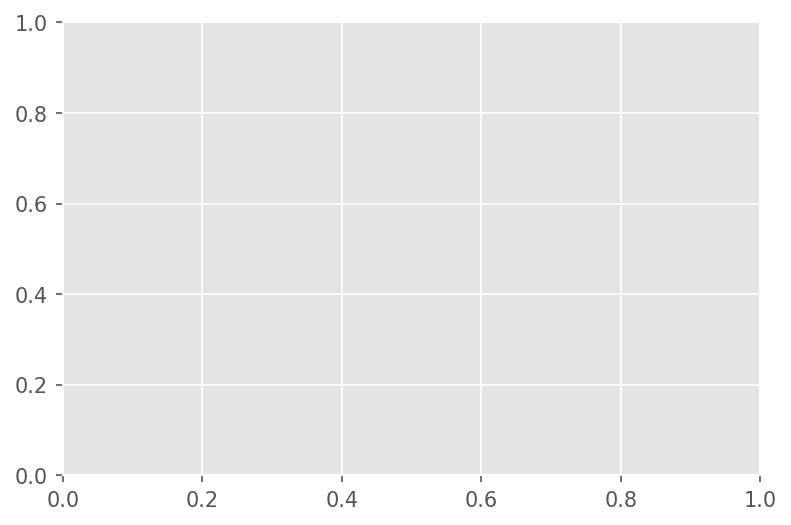

In [153]:
fig, ax = plt.subplots(dpi=150)
ax.plot(building_zero[building_zero["meter"] == 0]["timestamp"], building_zero[building_zero["meter"] == 0]["meter_reading"], color="blue")
ax.plot(building_zero[building_zero["meter"] == 1]["timestamp"], building_zero[building_zero["meter"] == 1]["meter_reading"], color="red")
# ax.plot(building_zero_1[building_zero_1["meter"] == 3]["timestamp"], building_zero_1[building_zero_1["meter"] == 3]["meter_reading"], color="green");

In [27]:
sample_submission_df.head()

,row_id,meter_reading
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


{0: electricity, 1: chilledwater, 2: steam, 3: hotwater}

In [31]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20216100 entries, 0 to 20216099
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   site_id        int64         
 1   building_id    int64         
 2   primary_use    object        
 3   square_feet    int64         
 4   year_built     float64       
 5   floor_count    float64       
 6   meter          int64         
 7   timestamp      datetime64[ns]
 8   meter_reading  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 1.5+ GB


## Start Here
### Metadata Cleaning

In [112]:
# Create copy and then drop year_built and floor_count because of so much missing data
metadata_copy = metadata_df.copy()
metadata_copy.drop(["year_built", "floor_count"], axis=1, inplace=True)
# Create dummy columns for the primary_usages
usage_dummies = pd.get_dummies(metadata_copy["primary_use"])
usage_dummies

,Education,Entertainment/public assembly,Food sales and service,Healthcare,Lodging/residential,Manufacturing/industrial,Office,Other,Parking,Public services,Religious worship,Retail,Services,Technology/science,Utility,Warehouse/storage
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1445,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1446,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1447,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [113]:
# Looking at the total number of buildings for each usage type. Could make a good pie chart.
usage_distribution = usage_dummies.sum(axis=0)
usage_distribution

Education                        549
Entertainment/public assembly    184
Food sales and service             5
Healthcare                        23
Lodging/residential              147
Manufacturing/industrial          12
Office                           279
Other                             25
Parking                           22
Public services                  156
Religious worship                  3
Retail                            11
Services                          10
Technology/science                 6
Utility                            4
Warehouse/storage                 13
dtype: int64

In [351]:
'''Joining the dummies back to the main database and then dropping the primary_use and Religious worship columns.
Religious worship was dropped because it had the lowest representation'''
# metadata_copy = metadata_copy.join(other=usage_dummies)
# metadata_copy.drop(["primary_use", "Religious worship"], axis=1, inplace=True)
metadata_copy.isnull().values.any()

False

In [124]:
# Grabbing the building_IDs for those in site zero for later use in converting the usage data to kWh and back
site_zero_building_IDs = metadata_copy[metadata_copy["site_id"] == 0]["building_id"]

### Weather Cleaning

In [385]:
# Turning object into datetime.
weather_train_df["timestamp"]= pd.to_datetime(weather_train_df["timestamp"])
weather_train_df["date"] = weather_train_df["timestamp"].dt.date
spring = (weather_train_df["date"] >= pd.to_datetime("2016-01-01").date()) & (weather_train_df["date"] < pd.to_datetime("2016-04-01").date())
summer = (weather_train_df["date"] >= pd.to_datetime("2016-04-01").date())& (weather_train_df["date"] < pd.to_datetime("2016-07-01").date())
fall = (weather_train_df["date"] >= pd.to_datetime("2016-07-01").date())& (weather_train_df["date"] < pd.to_datetime("2016-10-01").date())    
winter = (weather_train_df["date"] >= pd.to_datetime("2016-10-01").date())& (weather_train_df["date"] <= pd.to_datetime("2016-12-31").date())
weather_train_df["date"][spring] = "spring"
weather_train_df["date"][summer] = "summer"
weather_train_df["date"][fall] = "fall"
weather_train_df["date"][winter] = "winter"
date_dummies = pd.get_dummies(weather_train_df["date"])
weather_train_df = weather_train_df.join(other=date_dummies)
weather_train_df.drop(["date"], axis=1, inplace=True)

weather_train_df["time"] = weather_train_df["timestamp"].dt.time
early_morning = (weather_train_df["time"] >= pd.to_datetime("00:00:00").time()) & (weather_train_df["time"] < pd.to_datetime("06:00:00").time()) 
morning = (weather_train_df["time"] >= pd.to_datetime("06:00:00").time()) & (weather_train_df["time"] < pd.to_datetime("12:00:00").time())
afternoon = (weather_train_df["time"] >= pd.to_datetime("12:00:00").time()) & (weather_train_df["time"] < pd.to_datetime("18:00:00").time())
evening = (weather_train_df["time"] >= pd.to_datetime("18:00:00").time()) & (weather_train_df["time"] <= pd.to_datetime("23:59:00").time())
weather_train_df["time"][early_morning] = "early_morning"
weather_train_df["time"][morning] = "morning"
weather_train_df["time"][afternoon] = "afternoon"
weather_train_df["time"][evening] = "evening"
time_dummies = pd.get_dummies(weather_train_df["time"])
weather_train_df = weather_train_df.join(other=time_dummies)
weather_train_df.drop(["time"], axis=1, inplace=True)

'''Removing precip_depth_1_hr and clound_coverage because of the large amount of missing data. Also removing cloud_cover,
dew_temperature, sea_level_pressure, wind_direction, and wind speed due to missing values, but also simplicity of the model'''
# weather_train_df.drop(["cloud_coverage", "dew_temperature", "precip_depth_1_hr", "cloud_coverage", "sea_level_pressure", "wind_direction", "wind_speed"], axis=1, inplace=True)
weather_train_df

/Users/justintyrrell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/justintyrrell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/justintyrrell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,fall,spring,summer,winter,afternoon,early_morning,evening,morning
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,0,0,0,1,0,0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5,0,1,0,0,0,1,0,0
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0,0,1,0,0,0,1,0,0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0,0,1,0,0,0,1,0,0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139768,15,2016-12-31 19:00:00,3.0,NaN,-8.0,NaN,NaN,180.0,5.7,0,0,0,1,0,0,1,0
139769,15,2016-12-31 20:00:00,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7,0,0,0,1,0,0,1,0
139770,15,2016-12-31 21:00:00,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1,0,0,0,1,0,0,1,0
139771,15,2016-12-31 22:00:00,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6,0,0,0,1,0,0,1,0


In [376]:
# mean_temp = weather_train_df["air_temperature"].mean()
# weather_train_df["air_temperature"] = weather_train_df["air_temperature"].fillna(mean_temp)
weather_train_df[weather_train_df["timestamp"].astype("str").str.contains("2016-01-01")]

,site_id,timestamp,air_temperature,fall,summer,winter,afternoon,evening,morning
0,0,2016-01-01 00:00:00,25.0,0,0,0,0,0,0
1,0,2016-01-01 01:00:00,24.4,0,0,0,0,0,0
2,0,2016-01-01 02:00:00,22.8,0,0,0,0,0,0
3,0,2016-01-01 03:00:00,21.1,0,0,0,0,0,0
4,0,2016-01-01 04:00:00,20.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
131328,15,2016-01-01 18:00:00,-1.0,0,0,0,0,1,0
131329,15,2016-01-01 19:00:00,0.0,0,0,0,0,1,0
131330,15,2016-01-01 21:00:00,-3.0,0,0,0,0,1,0
131331,15,2016-01-01 22:00:00,-3.0,0,0,0,0,1,0


In [348]:
# train_df["timestamp"]= pd.to_datetime(train_df["timestamp"])
train_df.isnull().values.any()

False

In [324]:
first_combination = pd.merge(left=metadata_copy, right=train_df, how="right")

In [354]:
first_combination

,site_id,building_id,square_feet,Education,Entertainment/public assembly,Food sales and service,Healthcare,Lodging/residential,Manufacturing/industrial,Office,...,Parking,Public services,Retail,Services,Technology/science,Utility,Warehouse/storage,meter,timestamp,meter_reading
0,0,0,7432,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2016-01-01 00:00:00,0.000
1,0,1,2720,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2016-01-01 00:00:00,0.000
2,0,2,5376,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2016-01-01 00:00:00,0.000
3,0,3,23685,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2016-01-01 00:00:00,0.000
4,0,4,116607,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2016-01-01 00:00:00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,15,1444,19619,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2016-12-31 23:00:00,8.750
20216096,15,1445,4298,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2016-12-31 23:00:00,4.825
20216097,15,1446,11265,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2016-12-31 23:00:00,0.000
20216098,15,1447,29775,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,2016-12-31 23:00:00,159.575


In [360]:
second_combination = pd.merge(left=first_combination, right=weather_train_df, how="left")
second_combination[second_combination.isna().any(axis=1)]

,site_id,building_id,square_feet,Education,Entertainment/public assembly,Food sales and service,Healthcare,Lodging/residential,Manufacturing/industrial,Office,...,meter,timestamp,meter_reading,air_temperature,fall,summer,winter,afternoon,evening,morning
722,4,565,15326,1,0,0,0,0,0,0,...,0,2016-01-01 00:00:00,7.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN
723,4,566,2010,1,0,0,0,0,0,0,...,0,2016-01-01 00:00:00,0.519,NaN,NaN,NaN,NaN,NaN,NaN,NaN
724,4,569,86091,1,0,0,0,0,0,0,...,0,2016-01-01 00:00:00,246.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
725,4,570,193202,1,0,0,0,0,0,0,...,0,2016-01-01 00:00:00,79.488,NaN,NaN,NaN,NaN,NaN,NaN,NaN
726,4,571,47954,1,0,0,0,0,0,0,...,0,2016-01-01 00:00:00,17.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20201029,11,1031,93206,1,0,0,0,0,0,0,...,1,2016-12-31 17:00:00,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20201030,11,1031,93206,1,0,0,0,0,0,0,...,3,2016-12-31 17:00:00,172.806,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20201031,11,1032,127632,1,0,0,0,0,0,0,...,0,2016-12-31 17:00:00,283.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20201032,11,1032,127632,1,0,0,0,0,0,0,...,1,2016-12-31 17:00:00,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [333]:
# meter_dummies = pd.get_dummies(second_combination["meter"])
# second_combination = second_combination.join(other=meter_dummies)
# second_combination = second_combination.rename(columns={0:"electricity", 1:"chilledwater", 2:"steam", 3:"hotwater"})
# second_combination["meter_reading"].loc[second_combination["site_id"] == 0] = second_combination.loc[second_combination["site_id"] == 0, "meter_reading"].apply(lambda x: x*0.2931)

# second_combination.iloc[20213861]

/Users/justintyrrell/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [347]:
# final_dataset = second_combination.drop(["timestamp", "electricity", "site_id"], axis=1)
# final_dataset["row_id"] = final_dataset.index
final_dataset.isnull().values.any()

True

In [335]:
X = final_dataset.drop("meter_reading", axis=1)
y = final_dataset["meter_reading"]

In [339]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [518]:
y_train.max()

# rf = RandomForestClassifier()
# rf.fit(X_train, y_train)


21904700.0

In [331]:
sample_submission_df
test_df

,row_id,building_id,meter,timestamp
0,0,0,0,2017-01-01 00:00:00
1,1,1,0,2017-01-01 00:00:00
2,2,2,0,2017-01-01 00:00:00
3,3,3,0,2017-01-01 00:00:00
4,4,4,0,2017-01-01 00:00:00
...,...,...,...,...
41697595,41697595,1444,0,2018-05-09 07:00:00
41697596,41697596,1445,0,2018-05-09 07:00:00
41697597,41697597,1446,0,2018-05-09 07:00:00
41697598,41697598,1447,0,2018-05-09 07:00:00


In [523]:
weather_train_df["timestamp"]= pd.to_datetime(weather_train_df["timestamp"])
weather_train_df_copy = weather_train_df.copy()

weather_train_df_copy1 = weather_train_df.copy()
weather_train_df_copy2 = weather_train_df.copy()

weather_train_df_copy["date"] = weather_train_df_copy["timestamp"].dt.date
weather_train_df_copy.drop(["cloud_coverage", "dew_temperature", "precip_depth_1_hr", "sea_level_pressure", "wind_direction", "wind_speed", "timestamp"], axis=1, inplace=True)
weather_mean_db = weather_train_df_copy.groupby(by=["site_id", "date"]).mean()
# weather_train_df_copy2[weather_train_df_copy2["air_temperature"].isna()]

In [524]:
weather_mean_db

air_temperature
site_id date                       
0       2016-01-01        23.337500
        2016-01-02        19.537500
        2016-01-03        14.829167
        2016-01-04        12.666667
        2016-01-05        14.058333
...                             ...
15      2016-12-27         4.591667
        2016-12-28        -1.439130
        2016-12-29        -1.112500
        2016-12-30        -1.183333
        2016-12-31        -1.650000

[5856 rows x 1 columns]

In [493]:
import datetime
# x = datetime.datetime(2016, 1, 3)
weather_mean_db.loc[(0, datetime.date(2016, 1, 3))]["air_temperature"]
weather_train_df_copy1.iloc[139769, 1]

Timestamp('2016-12-31 20:00:00')

In [526]:
for idx, temp in enumerate(weather_train_df_copy1["air_temperature"]):
    if pd.isna(temp):
        year = weather_train_df_copy1.iloc[idx, 1].year
        month = weather_train_df_copy1.iloc[idx, 1].month
        day = weather_train_df_copy1.iloc[idx, 1].day
        weather_train_df_copy1.iloc[idx, 2] = weather_mean_db.loc[(weather_train_df_copy1.iloc[idx, 0] , datetime.date(year, month, day))]["air_temperature"]
        
        
'''second_combination["meter_reading"].loc[second_combination["site_id"] == 0] = 
second_combination.loc[second_combination["site_id"] == 0, "meter_reading"].apply(lambda x: x*0.2931)'''

# weather_train_df_copy1.iloc[94245]

'second_combination["meter_reading"].loc[second_combination["site_id"] == 0] = \nsecond_combination.loc[second_combination["site_id"] == 0, "meter_reading"].apply(lambda x: x*0.2931)'

In [528]:
weather_train_df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   site_id             139773 non-null  int64         
 1   timestamp           139773 non-null  datetime64[ns]
 2   air_temperature     139773 non-null  float64       
 3   cloud_coverage      70600 non-null   float64       
 4   dew_temperature     139660 non-null  float64       
 5   precip_depth_1_hr   89484 non-null   float64       
 6   sea_level_pressure  129155 non-null  float64       
 7   wind_direction      133505 non-null  float64       
 8   wind_speed          139469 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 9.6 MB


In [512]:
# weather_mean_db.loc[(0, datetime.date(2016, 1, 16))]["air_temperature"]

18.423809523809524

## Testing my scripted code to debug my impute temp nans function

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import time

In [16]:
def merge_dataframes(df1, df2, df3):
    new_df = pd.merge(left=df1, right=df2, how="right")
    new_df = pd.merge(left=new_df, right=df3, how="left")
    return new_df

def drop_initial_unused_cols(df, lst_of_cols_to_drop):
    return df.drop(lst_of_cols_to_drop, axis=1)

def create_datetime_dummies(df):
    df["timestamp"]= pd.to_datetime(df["timestamp"])
    df["date"] = df["timestamp"].dt.date
    spring = (df["date"] >= pd.to_datetime("2016-01-01").date()) & (df["date"] < pd.to_datetime("2016-04-01").date())
    summer = (df["date"] >= pd.to_datetime("2016-04-01").date())& (df["date"] < pd.to_datetime("2016-07-01").date())
    fall = (df["date"] >= pd.to_datetime("2016-07-01").date())& (df["date"] < pd.to_datetime("2016-10-01").date())    
    winter = (df["date"] >= pd.to_datetime("2016-10-01").date())& (df["date"] <= pd.to_datetime("2016-12-31").date())
    df["date"][spring] = "q1"
    df["date"][summer] = "q2"
    df["date"][fall] = "q3"
    df["date"][winter] = "q4"
    date_dummies = pd.get_dummies(df["date"])
    df = df.join(other=date_dummies)
    df.drop(["date"], axis=1, inplace=True)

    df["time"] = df["timestamp"].dt.time
    early_morning = (df["time"] >= pd.to_datetime("00:00:00").time()) & (df["time"] < pd.to_datetime("06:00:00").time()) 
    morning = (df["time"] >= pd.to_datetime("06:00:00").time()) & (df["time"] < pd.to_datetime("12:00:00").time())
    afternoon = (df["time"] >= pd.to_datetime("12:00:00").time()) & (df["time"] < pd.to_datetime("18:00:00").time())
    evening = (df["time"] >= pd.to_datetime("18:00:00").time()) & (df["time"] <= pd.to_datetime("23:59:00").time())
    df["time"][early_morning] = "early_morning"
    df["time"][morning] = "morning"
    df["time"][afternoon] = "afternoon"
    df["time"][evening] = "evening"
    time_dummies = pd.get_dummies(df["time"])
    df = df.join(other=time_dummies)
    df.drop(["time"], axis=1, inplace=True)
    return df

def create_primary_usage_and_meter_dummies(df):
    meter_dummies = pd.get_dummies(df["meter"])
    df = df.join(other=meter_dummies)
    df = df.rename(columns={0:"electricity", 1:"chilledwater", 2:"steam", 3:"hotwater"})
    df.drop(["meter"], axis=1, inplace=True)

    usage_dummies = pd.get_dummies(df["primary_use"])
    df = df.join(other=usage_dummies)
    df.drop(["primary_use", "Religious worship"], axis=1, inplace=True)
    return df

def convert_site_one_meter_readings(df, to_kWh=True):
    if to_kWh:
        df["meter_reading"].loc[df["site_id"] == 0] = df.loc[df["site_id"] == 0, "meter_reading"].apply(lambda x: x*0.2931)
    else:
        df["meter_reading"].loc[df["site_id"] == 0] = df.loc[df["site_id"] == 0, "meter_reading"].apply(lambda x: x*3.4118)
    return df

def create_temp_mean_df(weather_df):
    weather_df_copy = weather_df.copy()
    weather_df_copy["timestamp"]= pd.to_datetime(weather_train_df["timestamp"])
    weather_df_copy["date"] = weather_df_copy["timestamp"].dt.date
    weather_df_copy.drop(["cloud_coverage", "dew_temperature", "precip_depth_1_hr", "sea_level_pressure", "wind_direction", "wind_speed", "timestamp"], axis=1, inplace=True)
    temp_mean_df = weather_df_copy.groupby(by=["site_id", "date"]).mean()
    return temp_mean_df

def impute_temp_nans(df, temp_mean_df):
    start = time.time()
    for idx, temp in enumerate(df["air_temperature"]):
        if pd.isna(temp):
            year = df.iloc[idx, 3].year
            month = df.iloc[idx, 3].month
            day = df.iloc[idx, 3].day
            df.iloc[idx, 5] = temp_mean_df.loc[(df.iloc[idx, 0] , datetime.date(year, month, day))]["air_temperature"]
        if idx % 100000 == 0:
            checkpoint = time.time()
            print(f'{idx} 100,000 time:{checkpoint-start}')
    return df

def impute_temp_nans1(nan, df, temp_mean_df):
    year = df.iloc[idx, 3].year
    month = df.iloc[idx, 3].month
    day = df.iloc[idx, 3].day
    mean_temp = temp_mean_df.loc[(df.iloc[idx, 0] , datetime.date(year, month, day))]["air_temperature"]
    return mean_temp

def create_ref_col_and_drop_remaining_unused(df):
    df = df.drop(["timestamp", "site_id", "building_id"], axis=1)
    df["row_id"] = df.index
    return df

In [17]:
metadata_df = pd.read_csv("data/ashrae-energy-prediction/building_metadata.csv")
weather_train_df = pd.read_csv("data/ashrae-energy-prediction/weather_train.csv")
train_df = pd.read_csv("data/ashrae-energy-prediction/train.csv")
sample_submission_df = pd.read_csv("data/ashrae-energy-prediction/sample_submission.csv")
weather_test_df = pd.read_csv("data/ashrae-energy-prediction/weather_test.csv")
test_df = pd.read_csv("data/ashrae-energy-prediction/test.csv")

combined_df = merge_dataframes(metadata_df, train_df, weather_train_df)

lst_of_cols_to_drop = ["cloud_coverage", "dew_temperature", "precip_depth_1_hr", "sea_level_pressure", "wind_direction", "wind_speed", "year_built", "floor_count"]
combined_df = drop_initial_unused_cols( combined_df, lst_of_cols_to_drop)
combined_df = create_datetime_dummies(combined_df)
combined_df = create_primary_usage_and_meter_dummies(combined_df)
combined_df = convert_site_one_meter_readings(combined_df, to_kWh=True)

temp_mean_df = create_temp_mean_df(weather_train_df)

# combined_df = impute_temp_nans(combined_df, temp_mean_df)
# cleaned_df = create_ref_col_and_drop_remaining_unused(combined_df)
# cleaned_df.to_csv("../data/cleaned_df.csv")

/Users/justintyrrell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/justintyrrell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/justintyrrell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/justi

In [6]:
# nans = combined_df[combined_df["air_temperature"].isna()]
# corrected_nans = impute_temp_nans(nans, temp_mean_df)
# counter = 0
# for idx, val in enumerate(corrected_nans["air_temperature"]):
#     combined_df.iloc[idx, 5] = val
#     print(counter)
#     counter += 1
    

In [579]:
temp_mean_df.loc[(11, datetime.date(2016, 12, 31))]["air_temperature"]

-12.017391304347827

In [577]:
temp_mean_df.loc[4]

,air_temperature
date,
2016-01-01,6.056522
2016-01-02,7.533333
2016-01-03,9.300000
2016-01-04,10.691667
2016-01-05,11.608333
...,...
2016-12-27,7.429167
2016-12-28,8.387500
2016-12-29,10.029167


In [572]:
corrected_nans = impute_temp_nans(nans, temp_mean_df)
corrected_nans

/Users/justintyrrell/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


0 100,000 time:0.003052949905395508


,site_id,building_id,square_feet,timestamp,meter_reading,air_temperature,q1,q2,q3,q4,...,Manufacturing/industrial,Office,Other,Parking,Public services,Retail,Services,Technology/science,Utility,Warehouse/storage
722,4,565,15326,2016-01-01 00:00:00,7.250,6.056522,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
723,4,566,2010,2016-01-01 00:00:00,0.519,6.056522,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
724,4,569,86091,2016-01-01 00:00:00,246.000,6.056522,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
725,4,570,193202,2016-01-01 00:00:00,79.488,6.056522,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
726,4,571,47954,2016-01-01 00:00:00,17.000,6.056522,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20201029,11,1031,93206,2016-12-31 17:00:00,0.000,-12.017391,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
20201030,11,1031,93206,2016-12-31 17:00:00,172.806,-12.017391,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
20201031,11,1032,127632,2016-12-31 17:00:00,283.000,-12.017391,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
20201032,11,1032,127632,2016-12-31 17:00:00,0.000,-12.017391,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [546]:
# combined_df.head()
# df["meter_reading"].loc[df["site_id"] == 0] = df.loc[df["site_id"] == 0, "meter_reading"].apply(lambda x: x*0.2931)

def impute_temp_nans1(nan, df=combined_df, temp_mean_df=temp_mean_df):
    year = df.iloc[idx, 3].year
    month = df.iloc[idx, 3].month
    day = df.iloc[idx, 3].day
    mean_temp = temp_mean_df.loc[(df.iloc[idx, 0] , datetime.date(year, month, day))]["air_temperature"]
    return mean_temp

combined_df[combined_df["air_temperature"].isna()] = combined_df[combined_df["air_temperature"].isna()].apply(impute_temp_nans1, axis=1)

ValueError: Must have equal len keys and value when setting with an iterable

In [551]:
test = impute_temp_nans(nans, temp_mean_df)

0 100,000 time:0.0018398761749267578


In [543]:
test

,site_id,building_id,square_feet,timestamp,meter_reading,air_temperature,q1,q2,q3,q4,...,Manufacturing/industrial,Office,Other,Parking,Public services,Retail,Services,Technology/science,Utility,Warehouse/storage
722,4,565,15326,2016-01-01 00:00:00,7.250,6.056522,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
723,4,566,2010,2016-01-01 00:00:00,0.519,6.056522,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
724,4,569,86091,2016-01-01 00:00:00,246.000,6.056522,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
725,4,570,193202,2016-01-01 00:00:00,79.488,6.056522,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
726,4,571,47954,2016-01-01 00:00:00,17.000,6.056522,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20201029,11,1031,93206,2016-12-31 17:00:00,0.000,-12.017391,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
20201030,11,1031,93206,2016-12-31 17:00:00,172.806,-12.017391,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
20201031,11,1032,127632,2016-12-31 17:00:00,283.000,-12.017391,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
20201032,11,1032,127632,2016-12-31 17:00:00,0.000,-12.017391,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for idx, val in test["air_temperature"]:
    combined_df.iloc(idx, 5) = val

In [52]:
cleaned_df = pd.read_csv("../data/cleaned_df.csv")
cleaned_df = cleaned_df.drop("Unnamed: 0", axis=1)
cleaned_df

,square_feet,meter_reading,air_temperature,q1,q2,q3,q4,afternoon,early_morning,evening,...,Office,Other,Parking,Public services,Retail,Services,Technology/science,Utility,Warehouse/storage,row_id
0,7432,0.000,25.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2720,0.000,25.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,5376,0.000,25.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
3,23685,0.000,25.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
4,116607,0.000,25.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,19619,8.750,1.7,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,20216095
20216096,4298,4.825,1.7,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,20216096
20216097,11265,0.000,1.7,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,20216097
20216098,29775,159.575,1.7,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,20216098


In [73]:
import random
idx_lst = random.sample(range(20216049), 1000)
sample_data = cleaned_df.iloc[idx_lst]
sample_data.to_csv("../data/sample_cleaned_data.csv")

In [105]:
combined_df = pd.read_csv("../data/combined_df.csv")
idx_lst = random.sample(range(20216049), 1000)
sample_data = combined_df.iloc[idx_lst]
sample_data.to_csv("../data/sample_merged_raw_data.csv")
combined_df

,Unnamed: 0,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,timestamp,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,0,Education,7432,2008.0,NaN,0,2016-01-01 00:00:00,0.000,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,1,Education,2720,2004.0,NaN,0,2016-01-01 00:00:00,0.000,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2,Education,5376,1991.0,NaN,0,2016-01-01 00:00:00,0.000,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,0,3,Education,23685,2002.0,NaN,0,2016-01-01 00:00:00,0.000,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,0,4,Education,116607,1975.0,NaN,0,2016-01-01 00:00:00,0.000,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,20216095,15,1444,Entertainment/public assembly,19619,1914.0,NaN,0,2016-12-31 23:00:00,8.750,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216096,20216096,15,1445,Education,4298,NaN,NaN,0,2016-12-31 23:00:00,4.825,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216097,20216097,15,1446,Entertainment/public assembly,11265,1997.0,NaN,0,2016-12-31 23:00:00,0.000,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216098,20216098,15,1447,Lodging/residential,29775,2001.0,NaN,0,2016-12-31 23:00:00,159.575,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8


In [10]:
cleaned_df[cleaned_df["chilledwater"] == 1]

,Unnamed: 0,square_feet,meter_reading,air_temperature,q1,q2,q3,q4,afternoon,early_morning,...,Office,Other,Parking,Public services,Retail,Services,Technology/science,Utility,Warehouse/storage,row_id
172,172,11329,0.0000,15.6,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,172
174,174,98829,0.0000,15.6,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,174
176,176,72102,4.5719,15.6,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,176
181,181,553210,209.8860,15.6,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,181
184,184,86323,0.0000,15.6,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216039,20216039,48881,18.8120,1.7,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,20216039
20216042,20216042,11524,16.7000,1.7,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,20216042
20216044,20216044,9111,0.0000,1.7,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,20216044
20216046,20216046,39538,0.0000,1.7,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,20216046


In [11]:
cleaned_df[cleaned_df["electricity"] == 1]

,Unnamed: 0,square_feet,meter_reading,air_temperature,q1,q2,q3,q4,afternoon,early_morning,...,Office,Other,Parking,Public services,Retail,Services,Technology/science,Utility,Warehouse/storage,row_id
0,0,7432,0.000,25.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,2720,0.000,25.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,2,5376,0.000,25.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
3,3,23685,0.000,25.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3
4,4,116607,0.000,25.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,20216095,19619,8.750,1.7,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,20216095
20216096,20216096,4298,4.825,1.7,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,20216096
20216097,20216097,11265,0.000,1.7,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,20216097
20216098,20216098,29775,159.575,1.7,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,20216098


In [12]:
cleaned_df[cleaned_df["steam"] == 1]

,Unnamed: 0,square_feet,meter_reading,air_temperature,q1,q2,q3,q4,afternoon,early_morning,...,Office,Other,Parking,Public services,Retail,Services,Technology/science,Utility,Warehouse/storage,row_id
894,894,13512,0.0000,6.717391,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,894
898,898,30531,120.7860,6.717391,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,898
902,902,35990,4678.1400,6.717391,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,902
903,903,37485,0.0000,6.717391,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,903
906,906,39558,324.2260,6.717391,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216081,20216081,33148,259.0730,1.700000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,20216081
20216084,20216084,11302,1274.6600,1.700000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,20216084
20216086,20216086,111518,1518.9200,1.700000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,20216086
20216088,20216088,108971,852.7700,1.700000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,20216088


In [4]:
# hotwater_df = cleaned_df[cleaned_df["hotwater"] == 1]
# hotwater_df.to_csv("data/hotwater_df.csv")
hotwater_df = cleaned_df[cleaned_df["hotwater"] == 1]
# hotwater_df.to_csv("data/hotwater_df.csv")
hotwater_df = cleaned_df[cleaned_df["hotwater"] == 1]
# hotwater_df.to_csv("data/hotwater_df.csv")
hotwater_df = cleaned_df[cleaned_df["hotwater"] == 1]
# hotwater_df.to_csv("data/hotwater_df.csv")

Index(['square_feet', 'meter_reading', 'air_temperature', 'q1', 'q2', 'q3',
       'q4', 'afternoon', 'early_morning', 'evening', 'morning', 'electricity',
       'chilledwater', 'steam', 'hotwater', 'Education',
       'Entertainment/public assembly', 'Food sales and service', 'Healthcare',
       'Lodging/residential', 'Manufacturing/industrial', 'Office', 'Other',
       'Parking', 'Public services', 'Retail', 'Services',
       'Technology/science', 'Utility', 'Warehouse/storage', 'row_id'],
      dtype='object')

Non important features: 'electricity',
       "electricity","chilledwater", "steam", "hotwater", "Manufacturing/industrial","Other",
       "Parking", "Retail", "Services", "Utility", "Warehouse/storage"

most important features: square_feet, 

In [23]:
hotwater_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1264037 entries, 105 to 20215867
Data columns (total 31 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   square_feet                    1264037 non-null  int64  
 1   meter_reading                  1264037 non-null  float64
 2   air_temperature                1264037 non-null  float64
 3   q1                             1264037 non-null  int64  
 4   q2                             1264037 non-null  int64  
 5   q3                             1264037 non-null  int64  
 6   q4                             1264037 non-null  int64  
 7   afternoon                      1264037 non-null  int64  
 8   early_morning                  1264037 non-null  int64  
 9   evening                        1264037 non-null  int64  
 10  morning                        1264037 non-null  int64  
 11  electricity                    1264037 non-null  int64  
 12  chilledwate

In [31]:
np.log(hotwater_df[hotwater_df.loc[:,"meter_reading"] > 0].loc[:, "meter_reading"])
# df[df["meter_reading"] > 0]["meter_reading"] = np.log(df[df["meter_reading"] > 0]["meter_reading"])

113         4.574484
115         2.975376
117         4.605170
121         2.979649
124         5.298317
              ...   
20215844    7.814646
20215847    7.554508
20215850    5.897206
20215852    5.050176
20215867    9.047941
Name: meter_reading, Length: 923694, dtype: float64

In [34]:
test_df.tail()

,row_id,building_id,meter,timestamp
41697595,41697595,1444,0,2018-05-09 07:00:00
41697596,41697596,1445,0,2018-05-09 07:00:00
41697597,41697597,1446,0,2018-05-09 07:00:00
41697598,41697598,1447,0,2018-05-09 07:00:00
41697599,41697599,1448,0,2018-05-09 07:00:00


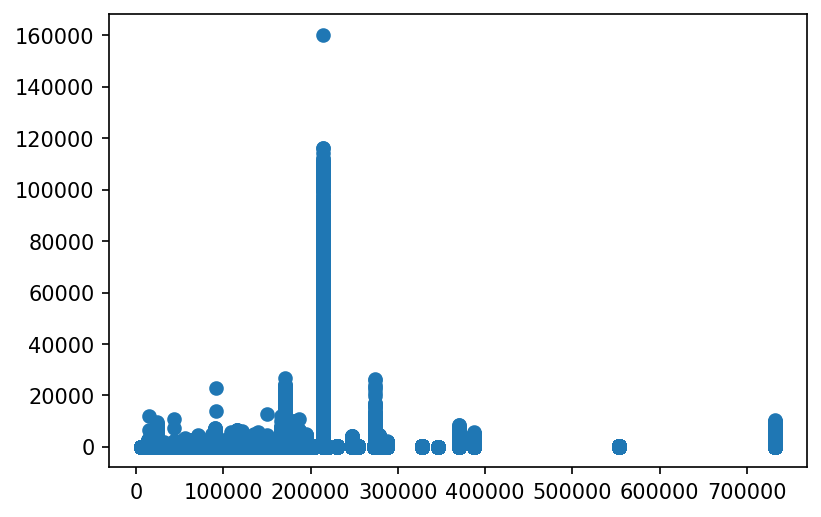

In [6]:
# mpl.rcParams['agg.path.chunksize'] = 10000
fig, ax =plt.subplots(dpi=150)
plt.scatter(hotwater_df["square_feet"], hotwater_df["meter_reading"])
plt.show()

In [14]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41697600 entries, 0 to 41697599
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   row_id       int64 
 1   building_id  int64 
 2   meter        int64 
 3   timestamp    object
dtypes: int64(3), object(1)
memory usage: 1.2+ GB


In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int64  
 1   meter          int64  
 2   timestamp      object 
 3   meter_reading  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 616.9+ MB


In [20]:
def is_it_there(df):
    if "row_id" not in df.columns:
        print("not there")
    elif "row_id" in df.columns:
        print("it's there")

is_it_there(train_df)

not there


In [24]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site_id      1449 non-null   int64  
 1   building_id  1449 non-null   int64  
 2   primary_use  1449 non-null   object 
 3   square_feet  1449 non-null   int64  
 4   year_built   675 non-null    float64
 5   floor_count  355 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 68.0+ KB


In [27]:
hotwater_subset = pd.read_csv("../data/hotwater_subset.csv")
hotwater_subset.head()

,Unnamed: 0,Unnamed: 0.1,square_feet,meter_reading,air_temperature,q1,q2,q3,q4,afternoon,...,Office,Other,Parking,Public services,Retail,Services,Technology/science,Utility,Warehouse/storage,row_id
0,105,105,5374,0.000,3.8,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,105
1,109,109,56995,0.000,3.8,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,109
2,113,113,32206,96.978,3.8,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,113
3,115,115,100481,19.597,3.8,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,115
4,117,117,139683,100.000,3.8,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,117


In [36]:
electric = cleaned_df[cleaned_df["electricity"] == 1]
electric

,square_feet,meter_reading,air_temperature,q1,q2,q3,q4,afternoon,early_morning,evening,...,Office,Other,Parking,Public services,Retail,Services,Technology/science,Utility,Warehouse/storage,row_id
0,7432,0.000,25.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2720,0.000,25.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,5376,0.000,25.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
3,23685,0.000,25.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
4,116607,0.000,25.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,19619,8.750,1.7,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,20216095
20216096,4298,4.825,1.7,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,20216096
20216097,11265,0.000,1.7,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,20216097
20216098,29775,159.575,1.7,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,20216098


In [48]:
# electric.set_index("row_id")
electric.to_csv("../data/electric.csv")

In [49]:
electric_1 = pd.read_csv("../data/electric.csv", index_col="Unnamed: 0")
electric_1

/Users/justintyrrell/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,square_feet,meter_reading,air_temperature,q1,q2,q3,q4,afternoon,early_morning,evening,...,Office,Other,Parking,Public services,Retail,Services,Technology/science,Utility,Warehouse/storage,row_id
0,7432,0.000,25.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2720,0.000,25.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,5376,0.000,25.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
3,23685,0.000,25.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
4,116607,0.000,25.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,19619,8.750,1.7,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,20216095
20216096,4298,4.825,1.7,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,20216096
20216097,11265,0.000,1.7,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,20216097
20216098,29775,159.575,1.7,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,20216098


In [8]:
new_df = pd.merge(left=metadata_df, right=train_df, how="right")
new_df = pd.merge(left=new_df, right=weather_train_df, how="left")

In [118]:
new_df[new_df["air_temperature"].isna()]

,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,timestamp,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
722,4,565,Education,15326,1954.0,2.0,0,2016-01-01 00:00:00,7.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN
723,4,566,Education,2010,1957.0,1.0,0,2016-01-01 00:00:00,0.519,NaN,NaN,NaN,NaN,NaN,NaN,NaN
724,4,569,Education,86091,1964.0,8.0,0,2016-01-01 00:00:00,246.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
725,4,570,Education,193202,1964.0,10.0,0,2016-01-01 00:00:00,79.488,NaN,NaN,NaN,NaN,NaN,NaN,NaN
726,4,571,Education,47954,1980.0,3.0,0,2016-01-01 00:00:00,17.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20201029,11,1031,Education,93206,NaN,NaN,1,2016-12-31 17:00:00,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20201030,11,1031,Education,93206,NaN,NaN,3,2016-12-31 17:00:00,172.806,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20201031,11,1032,Education,127632,NaN,NaN,0,2016-12-31 17:00:00,283.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20201032,11,1032,Education,127632,NaN,NaN,1,2016-12-31 17:00:00,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
weather_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   site_id             139773 non-null  int64  
 1   timestamp           139773 non-null  object 
 2   air_temperature     139718 non-null  float64
 3   cloud_coverage      70600 non-null   float64
 4   dew_temperature     139660 non-null  float64
 5   precip_depth_1_hr   89484 non-null   float64
 6   sea_level_pressure  129155 non-null  float64
 7   wind_direction      133505 non-null  float64
 8   wind_speed          139469 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.6+ MB


In [33]:
percent_nan_lst = []
for column in new_df.columns:
    nan = round(((new_df[column].isna().sum()) / 20216100) * 100, 2)
    percent_nan_lst.append(nan)
percent_nan_lst = pd.Series(percent_nan_lst, name='Missing values')    
features = pd.Series(new_df.columns, name="Features")
for word in features:
    features.replace(word, word.replace("_", " "), inplace=True)
df = pd.concat([features, percent_nan_lst], axis=1)
df["Values"] = abs(df["Missing values"] - 100)
df = df.sort_values("Missing values")

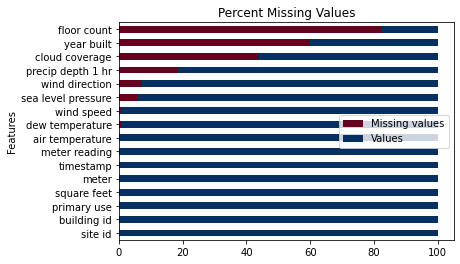

In [35]:
# importing packages
import pandas as pd
import matplotlib.pyplot as plt
df.plot(
    x = 'Features',
    kind = 'barh',
    stacked = True,
    title = 'Percent Missing Values',
    mark_right = True,
    colormap = "RdBu");

In [36]:
train_df

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.000
1,1,0,2016-01-01 00:00:00,0.000
2,2,0,2016-01-01 00:00:00,0.000
3,3,0,2016-01-01 00:00:00,0.000
4,4,0,2016-01-01 00:00:00,0.000
...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750
20216096,1445,0,2016-12-31 23:00:00,4.825
20216097,1446,0,2016-12-31 23:00:00,0.000
20216098,1447,0,2016-12-31 23:00:00,159.575


In [75]:
hotwater_target[hotwater_target >= 0] = hotwater_target[hotwater_target >= 0].apply(lambda x: np.log(x+1))
hotwater_target

/Users/justintyrrell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


105         0.000000
109         0.000000
113         4.584743
115         3.025145
117         4.615121
              ...   
20215844    7.815050
20215847    7.555031
20215850    5.899949
20215852    5.056564
20215867    9.048059
Name: meter_reading, Length: 1264037, dtype: float64

In [72]:
hotwater_target[hotwater_target >= 0] = hotwater_target[hotwater_target >= 0].apply(lambda x: np.expm1(x))
hotwater_target

/Users/justintyrrell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


105          0.000000e+00
109          0.000000e+00
113          1.309213e+42
115          3.242418e+08
117          2.688117e+43
                ...      
20215844              inf
20215847              inf
20215850    1.234363e+158
20215852     5.910904e+67
20215867              inf
Name: meter_reading, Length: 1264037, dtype: float64

In [45]:
np.expm1(5.078761)

159.57498022617654

In [73]:
hotwater_subset = pd.read_csv("../data/hotwater_subset.csv", index_col="Unnamed: 0")
hotwater_subset

/Users/justintyrrell/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Unnamed: 0.1,square_feet,meter_reading,air_temperature,q1,q2,q3,q4,afternoon,early_morning,...,Office,Other,Parking,Public services,Retail,Services,Technology/science,Utility,Warehouse/storage,row_id
105,105,5374,0.000,3.8,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,105
109,109,56995,0.000,3.8,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,109
113,113,32206,96.978,3.8,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,113
115,115,100481,19.597,3.8,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,115
117,117,139683,100.000,3.8,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20215844,20215844,166489,2476.610,6.1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,20215844
20215847,20215847,87200,1909.330,6.1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,20215847
20215850,20215850,84688,364.019,6.1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,20215850
20215852,20215852,155177,156.050,1.7,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,20215852


In [58]:
steam_subset = pd.read_csv("../data/steam_subset.csv", index_col="Unnamed: 0")
steam_subset

/Users/justintyrrell/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Unnamed: 0.1,square_feet,meter_reading,air_temperature,q1,q2,q3,q4,afternoon,early_morning,...,Office,Other,Parking,Public services,Retail,Services,Technology/science,Utility,Warehouse/storage,row_id
894,894,13512,0.0000,6.717391,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,894
898,898,30531,120.7860,6.717391,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,898
902,902,35990,4678.1400,6.717391,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,902
903,903,37485,0.0000,6.717391,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,903
906,906,39558,324.2260,6.717391,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216081,20216081,33148,259.0730,1.700000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,20216081
20216084,20216084,11302,1274.6600,1.700000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,20216084
20216086,20216086,111518,1518.9200,1.700000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,20216086
20216088,20216088,108971,852.7700,1.700000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,20216088


In [74]:
hotwater_target = hotwater_subset["meter_reading"]
hotwater_target

105            0.000
109            0.000
113           96.978
115           19.597
117          100.000
              ...   
20215844    2476.610
20215847    1909.330
20215850     364.019
20215852     156.050
20215867    8501.020
Name: meter_reading, Length: 1264037, dtype: float64

In [60]:
steam_target = steam_subset["meter_reading"]
steam_target

894            0.0000
898          120.7860
902         4678.1400
903            0.0000
906          324.2260
              ...    
20216081     259.0730
20216084    1274.6600
20216086    1518.9200
20216088     852.7700
20216093      55.6241
Name: meter_reading, Length: 2708713, dtype: float64

In [63]:
combined_target = pd.concat([steam_target, hotwater_target], axis=0)
combined_target

894            0.000
898          120.786
902         4678.140
903            0.000
906          324.226
              ...   
20215844    2476.610
20215847    1909.330
20215850     364.019
20215852     156.050
20215867    8501.020
Name: meter_reading, Length: 3972750, dtype: float64

In [77]:
train_df.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [147]:
percent_electricity = round((train_df[train_df["meter"] == 0]["meter"].count() / train_df["meter"].count() * 100), 2)
percent_chilled_water = round((train_df[train_df["meter"] == 1]["meter"].count() / train_df["meter"].count() * 100), 2)
percent_steam = round((train_df[train_df["meter"] == 2]["meter"].count() / train_df["meter"].count() * 100), 2)
percent_hot_water = round((train_df[train_df["meter"] == 3]["meter"].count() / train_df["meter"].count() * 100), 2)

NameError: name 'series' is not defined

In [148]:
series = pd.Series([percent_electricity, percent_chilled_water, percent_steam, percent_hot_water], index=["Electricity", "Chilled Water", "Steam", "Hot Water"])

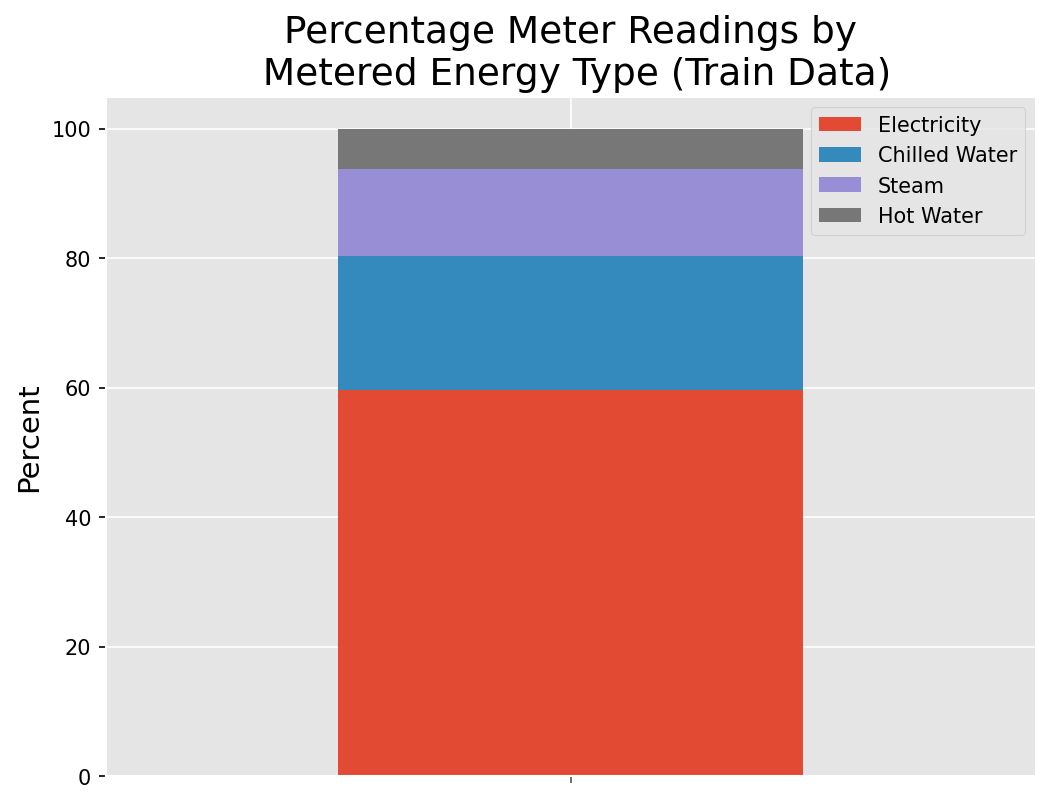

In [152]:
fig, ax = plt.subplots(figsize=(8,6),dpi=150)

pd.DataFrame(series).T.plot.bar(stacked=True, ax=ax)
plt.style.use('ggplot')
ax.set_title("Percentage Meter Readings by\n Metered Energy Type (Train Data)", fontsize=18, color="black")
ax.set_ylabel("Percent", fontsize=14, color="black")
ax.xaxis.label.set_color('black')
ax.tick_params(axis='y', colors='black')
plt.xticks(visible=False);
plt.savefig("../images/meter_type_distribution.png", bbox_inches='tight')